# **Simple Trading Strategy using Moving Averages**

1. Set the environment

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

2. Import of NVDA data and Moving averages computation

In [81]:
#Import of NVIDIA historical data (last 5 years) from .csv file stored in Google Drive
nvda= pd.read_csv('/content/drive/MyDrive/NVDA.csv', index_col='Date')

#Creation of two columns and computation of Moving Averages at 10 and 50 periods
nvda['MA10'] = nvda['Close'].rolling(10).mean()
nvda['MA50'] = nvda['Close'].rolling(50).mean()

#Elimination of 'Not a number' data
nvda = nvda.dropna()
nvda.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2019-10-29,5.15575,5.16225,5.05350,5.07300,5.048876,211236000,4.942025,4.511260
2019-10-30,5.10000,5.10575,5.00650,5.07500,5.050866,205960000,4.964000,4.528825
2019-10-31,5.05400,5.07500,4.94525,5.02550,5.001603,209732000,4.980825,4.543720
2019-11-01,4.99000,5.09725,4.96475,5.06475,5.040667,283640000,5.011075,4.559275
2019-11-04,5.14625,5.27500,5.12300,5.26250,5.237475,376716000,5.047300,4.583305


3. Creation of trading startegy and signal
  - If the MA10 is above the MA50, buy one share of NVDA
  - Buy one share when the value in column 'Shares' is equal to 1

In [82]:
#Creation of a new column 'Shares' containing the signal '1' to buy a share of NVDA when MA10 is above MA50
nvda['Shares'] = [1 if nvda.loc[ei, 'MA10'] > nvda.loc[ei, 'MA50'] else 0 for ei in nvda.index]

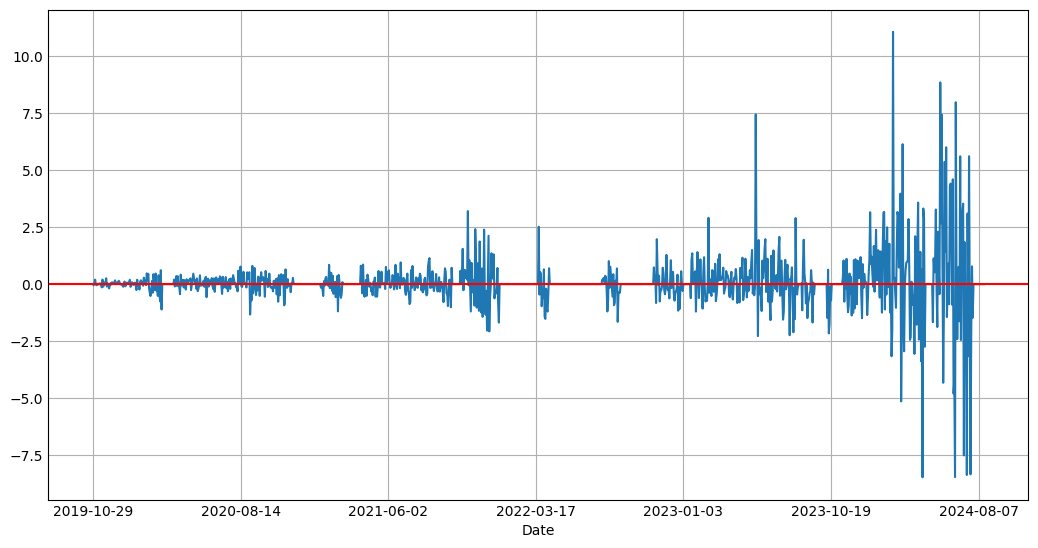

In [83]:
#Computation of the P&L as the difference between the closing price of the day in which a share is bought and the closing price of the previous day, otherwise zero
nvda['Close1'] = nvda['Close'].shift(-1)
nvda['Profit'] = [nvda.loc[ei, 'Close1'] - nvda.loc[ei, 'Close'] if nvda.loc[ei, 'Shares'] == 1 else 0 for ei in nvda.index]

#Graphical representation of the P&L
plt.figure(figsize=(10,5))
nvda['Profit'].plot()
plt.axhline(y=0, color='red')


In [84]:
#Calculation of the accumulated wealth during the trading period
nvda['Wealth'] = nvda['Profit'].cumsum()
nvda.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,Wealth
Date,,,,,,,,,,,,
2024-08-12,106.320000,111.070000,106.260002,109.019997,109.019997,325559900,105.957999,119.95472,0,116.139999,0.0,78.839241
2024-08-13,112.440002,116.230003,111.580002,116.139999,116.139999,312646700,107.198999,120.08486,0,118.080002,0.0,78.839241
2024-08-14,118.529999,118.599998,114.070000,118.080002,118.080002,339246400,107.305000,120.14646,0,122.860001,0.0,78.839241
2024-08-15,118.760002,123.239998,117.470001,122.860001,122.860001,318086700,108.670000,120.27492,0,124.580002,0.0,78.839241
2024-08-16,121.940002,125.000000,121.180000,124.580002,124.580002,302589900,110.401000,120.31772,0,NaN,0.0,78.839241


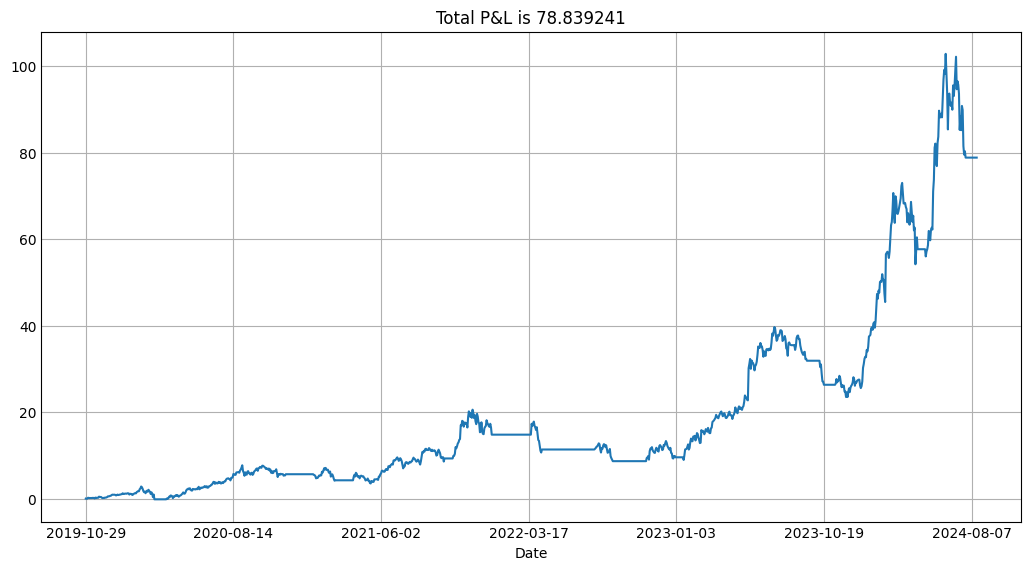

In [85]:
#Graphical representation of profits growth over the period
plt.figure(figsize=(10,5))
nvda['Wealth'].plot()
plt.title('Total P&L is {}'.format(nvda.loc[nvda.index[-2], 'Wealth']))
plt.show()
